<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-2%20%EA%B5%90%EC%B0%A8%20%EA%B2%80%EC%A6%9D%EA%B3%BC%20%EA%B7%B8%EB%A6%AC%EB%93%9C%20%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교차 검증과 그리드 서치

## 검증 세트

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 분석용 데이터 입력
directory_for_ml = '../data/data_for_ml/'
fname = 'df_sec_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)

In [132]:
data = df.iloc[:, :-2]
target = df.iloc[:, -1]

In [71]:
data = df.iloc[:, [7,8,9,10,11,17]]
target = df.iloc[:, -1]

In [118]:
data = df.iloc[:, [4, 5, 7,8,9,10, 12,13,14,15,16]]
target = df.iloc[:, -1]

In [7]:
cc = data.columns[:-3]

In [44]:
cc

Index(['retail', 'foreigner', 'institution', 'financial', 'invtrust',
       'pension', 'privequity', 'open', 'high', 'low', 'close', 'vol',
       'dji_cr', 'ixic_cr', 'spx_cr'],
      dtype='object')

In [106]:
data.head()

,retail,foreigner,institution,financial,invtrust,pension,privequity,dji_cr,ixic_cr,spx_cr,weekday
2022-06-21,-0.674957,-0.407361,2.593047,0.295068,-0.938927,-0.883900,-0.821502,2.16,2.51,2.45,0
2022-06-22,-0.226413,-0.166064,-0.135501,0.034853,3.990909,4.034743,-0.044910,-0.16,-0.15,-0.13,1
2022-06-23,-0.115765,-0.743679,-1.316192,-1.102356,-0.227930,0.236304,-4.804075,0.64,1.62,0.95,2
2022-06-24,-1.523278,3.064922,-8.766880,-20.769609,-2.370714,-0.040771,-0.727922,2.69,3.34,3.06,3
2022-06-27,0.124675,-0.502665,-0.416763,-0.363348,-0.698910,0.104842,2.208481,-0.20,-0.72,-0.30,4


In [41]:
sample_list = np.random.choice(15, 6, replace=False) # 중복허용하지 않음.

In [42]:
aa = np.sort(sample_list)
aa

array([ 2,  3,  8,  9, 10, 13])

In [43]:
for i in range(10):
    sample_list = np.random.choice(15, 6, replace=False)
    aa = np.sort(sample_list)
    print(aa)
    

[ 2  6  7  8 11 14]
[ 3  5  7  8  9 12]
[ 0  1  3  6 10 13]
[ 1  5  8  9 10 13]
[ 0  4  8 12 13 14]
[ 1  2  5  6  9 13]
[ 2  3  6  8  9 13]
[ 4  6  7  8 10 13]
[ 2  3  4  5  8 11]
[ 2  4  5  6  9 12]


In [ ]:
data = df.iloc[:, :-2]
target = df.iloc[:, -1]

<AxesSubplot:>

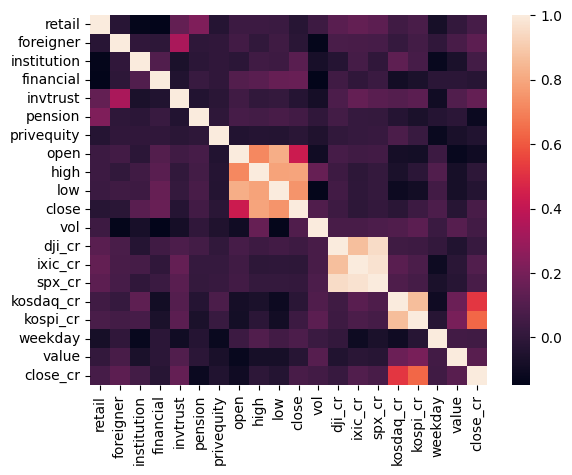

In [117]:
sns.heatmap(df.corr())

In [ ]:
[4, 5, 7,8,9,10, 12,13,14,15,16]

In [133]:
rand_num = 42
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=rand_num, stratify=target)

In [134]:
sts = StandardScaler()
sts.fit(train_input)
train_scaled = sts.transform(train_input)
test_scaled = sts.transform(test_input)

훈련세트가 2만이 넘는다면 훈련세트로만 전체를 사용하고 val set는 없어도 되고, 데이터가 충분히 많다면 val set는 5~ 10%만 지정해서 사용해도 됨

In [135]:
print(train_input.shape, test_input.shape)

(127, 18) (32, 18)


In [136]:
dt = DecisionTreeClassifier(random_state=rand_num)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [137]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train_score : {} \ntest_score : {}'.format(train_score, test_score))

train_score : 1.0 
test_score : 0.8125


## 교차 검증 <br>
ML에서는 샘플수가 충분히 많지 않기 때문에 교차검증을 시행하여 최적의 파마미터을 찾게 되지만, 딥러닝에서는 샘플 수가 충분하여 교차검증을 하지 않고, 훈련세트와 검증세트로만 나누어 사용함 <br>
따라서, tensorflow, keras같은 경우는 gridsearchcv와 같은 기능이 그렇게 많지 않음. tensorflow, keras는 데이터을 읽어들이는 도구들이 많이 발달되어 있음.

In [143]:
from sklearn.model_selection import cross_validate

In [144]:
dt = DecisionTreeClassifier(random_state=rand_num)

In [145]:
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=10, n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


In [146]:
scores

{'fit_time': array([0.00100017, 0.00150871, 0.00099993, 0.00099993, 0.00200009,
        0.00199986, 0.00199986, 0.00099969, 0.00100064, 0.00100064]),
 'score_time': array([0.        , 0.        , 0.        , 0.00100017, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.53846154, 0.76923077, 0.76923077, 0.61538462, 0.61538462,
        0.61538462, 0.61538462, 0.83333333, 0.66666667, 0.66666667])}

In [147]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.6705128205128206 (+/- 0.08696239939544421


'# dt.score(test_input, test_target) <br>
cross_validate에서의 fit기능은 무엇인가? <br>
.fit는 언제하는가?

#### 분류기(splitter) 사용 <br>
클라스가 고르게 섞이게 하기 위하여 사용 <br>
회귀모델에서는 KFold() 객체, 분류모델에서는 StratifiedKFold() 사용 <br>
cross_validate method에서는 estimator에 따라 분류인지, 회귀인지를 확인하고, cv를 StratifiedKFlod()를 사용할지 KFold를 사용할 지 자동으로 결정하여 진행함.

In [148]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=StratifiedKFold(10), 
                        n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


In [149]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.6705128205128206 (+/- 0.08696239939544421


위에서 cv=5를 적용한 cross_validate결과와 동일한 결과가 나옴.<br>
아래 splitter를 사용하여 상세하게 파라미터를 구성하여 사용

In [150]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=rand_num)
scores = cross_validate(dt, train_scaled, train_target, cv=splitter)
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.7076923076923077 (+/- 0.11243377771881367


## 하이퍼파라미터 튜닝 <br>
최적의 파라미터를 찾기 위한 loop실행

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  params,
                  n_jobs=-1) # -1:모든 cpu core를 사용
gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
dt_score = dt.score(train_input, train_target)
print('best estimator score: {}'.format(dt_score))

In [ ]:
print(gs.best_params_)

In [ ]:
for k, v in gs.cv_results_.items():
  if k == 'params':
    print('params')
    for k, v in params.items():
      print(k, v)
    continue
  print('{}: {}'.format(k, v))

In [ ]:
gs.cv_results_['mean_test_score']

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
# from numpy.random import uniform, randint # 기능은 같고 모양은 틀리나, 객체를 생성하지 못함.(아래 예 참조)

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter: params 의 임의변수를 100번 시행
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

## 확인문제

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))